In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',100)

# Data Load & Clean Up

In [131]:
df_raw = pd.read_csv(r'D:\Jes\Education\2024 DSI\Week 8 - Team Project\Team Git\team_project\data\raw\new_retail_data.csv', usecols = ['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'])

print(df_raw.info())
df_raw.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   City              301762 non-null  object 
 3   State             301729 non-null  object 
 4   Country           301739 non-null  object 
 5   Age               301837 non-null  float64
 6   Gender            301693 non-null  object 
 7   Income            301720 non-null  object 
 8   Customer_Segment  301795 non-null  object 
 9   Date              301651 non-null  object 
 10  Year              301660 non-null  float64
 11  Month             301737 non-null  object 
 12  Time              301660 non-null  object 
 13  Total_Purchases   301649 non-null  float64
 14  Amount            301653 non-null  float64
 15  Total_Amount      301660 non-null  float64
 16  Product_Category  30

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab


In [ ]:
# null handling code

In [109]:
# Drop null rows
df = df_raw.dropna()

# Data type conversions
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Create a new column to store yearmonth as integer
df['yearmonth'] = df['Date'].dt.strftime('%Y%m')
df.rename(columns={'Date':'yearmonthday'},inplace=True)

df.head(3)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,yearmonthday,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,202309
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,202312
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,202304


# EDA

In [113]:
# Categorize columns
    # using set 
# cat_columns = {'City','State','Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','products'}
# date_columns = {'Transaction_Date','Year','Month','Time','yearmonth'}
# quan_columns = set(df.columns) - cat_columns - date_columns

    # using list
cat_columns = ['City','State','Country','Gender','Income','Customer_Segment','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','products']
date_columns = ['Transaction_Date','Year','Month','Time','yearmonth','yearmonthday']
quan_columns = [col for col in df.columns if col not in cat_columns and col not in date_columns]

df.columns

Index(['Transaction_ID', 'Customer_ID', 'City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'yearmonthday', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount',
       'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products', 'yearmonth'],
      dtype='object')

In [114]:
# Count of unique values of categorical columns 
for col in cat_columns:
    print(f"{col}: {df[col].nunique()}")

# Unique Values of some columns
for col in cat_columns:
    if df[col].nunique() < 6:
        print(f"{col}: {df[col].unique()}")


City: 130
State: 54
Country: 5
Gender: 2
Income: 3
Customer_Segment: 3
Product_Category: 5
Product_Brand: 18
Product_Type: 33
Feedback: 4
Shipping_Method: 3
Payment_Method: 4
Order_Status: 4
products: 318
Country: ['Germany' 'UK' 'Australia' 'Canada' 'USA']
Gender: ['Male' 'Female']
Income: ['Low' 'High' 'Medium']
Customer_Segment: ['Regular' 'Premium' 'New']
Product_Category: ['Clothing' 'Electronics' 'Books' 'Home Decor' 'Grocery']
Feedback: ['Excellent' 'Average' 'Bad' 'Good']
Shipping_Method: ['Same-Day' 'Standard' 'Express']
Payment_Method: ['Debit Card' 'Credit Card' 'PayPal' 'Cash']
Order_Status: ['Shipped' 'Processing' 'Pending' 'Delivered']


## Demographic

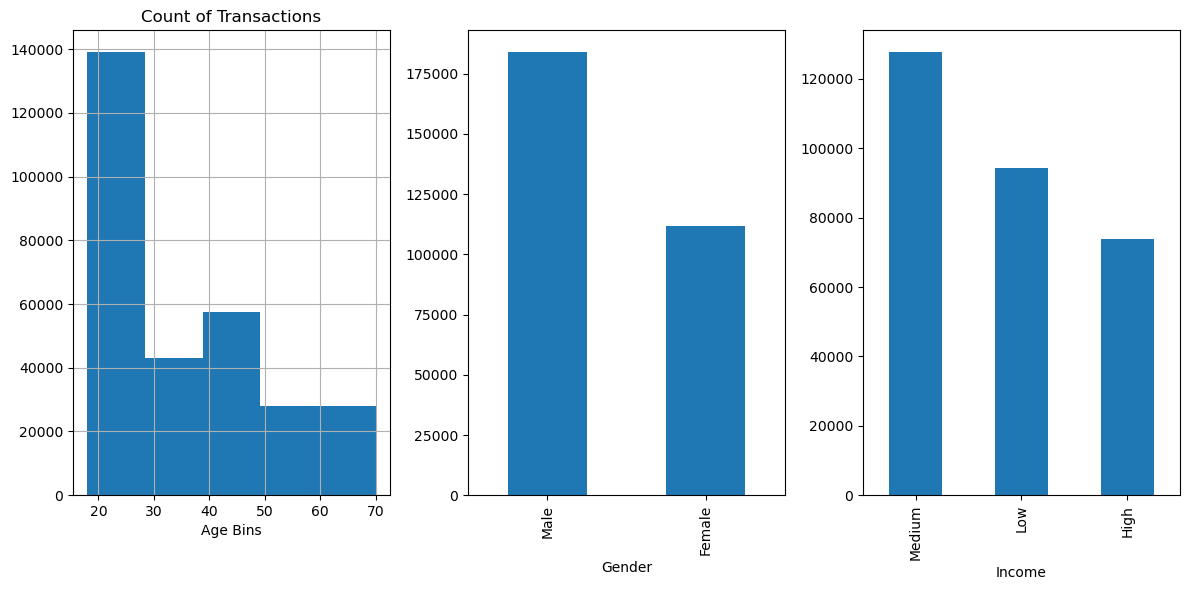

In [115]:
# Demographic Data - count of transactions

# df['Age'].describe()
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
df['Age'].hist(bins=5)
plt.title('Count of Transactions')
plt.xlabel('Age Bins')

plt.subplot(1, 3, 2)
df['Gender'].value_counts().plot(kind='bar')

plt.subplot(1, 3, 3)
df['Income'].value_counts().plot(kind='bar')

plt.tight_layout()

In [80]:
# # Value of transactions - age
# df_plot = df

# # Bin age
# df_plot['Age_bin'] = pd.cut(df['Age'], bins=10)

# # Aggregate transaction amount: sum & average
# df_plot = df_plot.groupby(['Age_bin'])['Total_Amount'].agg(['sum','mean']).reset_index()

# # Convert Total Sum into Millions
# df_plot['sum'] = df_plot['sum'] / 1_000_000
# # Plot
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# df_plot.plot(x='Age_bin', y='sum', kind='bar', ax=plt.gca())
# plt.title('Total Transaction Value')
# plt.ylabel('Transaction Value in Millions')

# plt.subplot(1, 2, 2)
# df_plot.plot(x='Age_bin', y='mean', kind='bar', ax=plt.gca())
# plt.title('Average Transaction Value')

# plt.show()

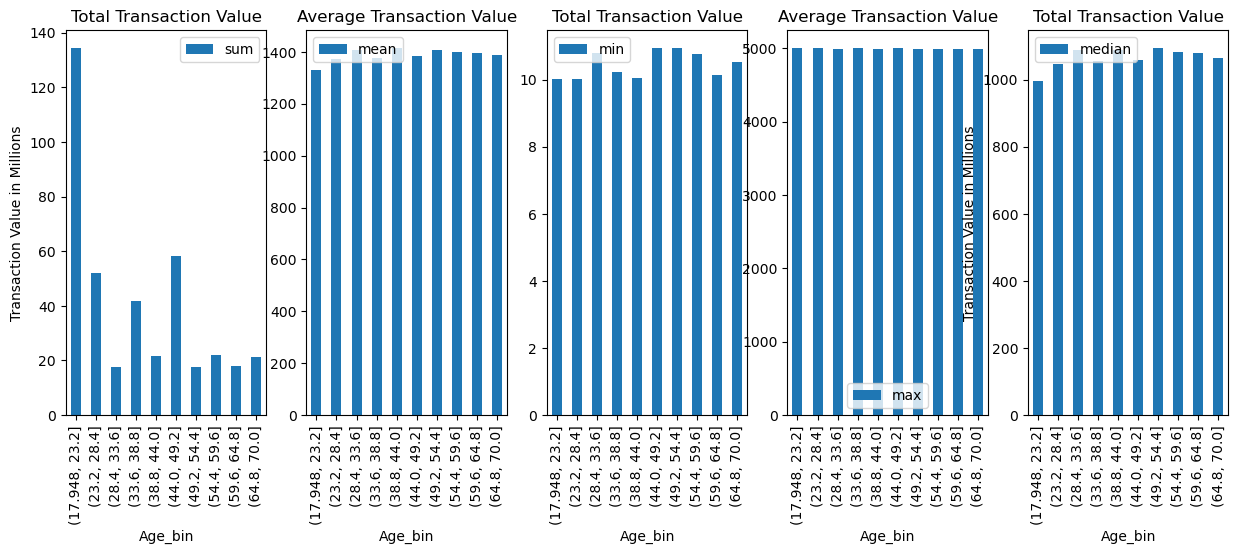

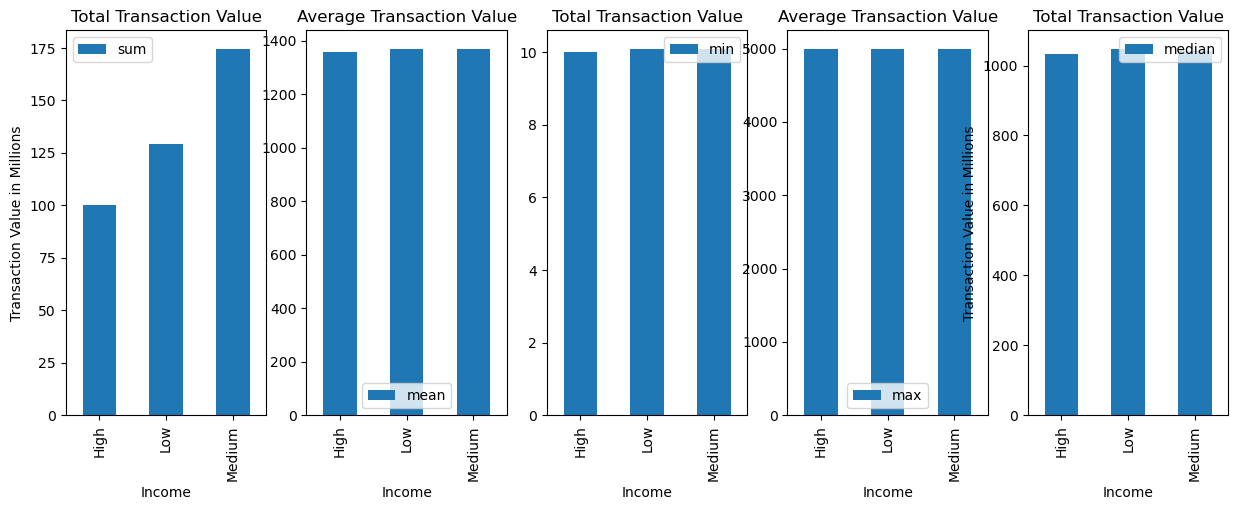

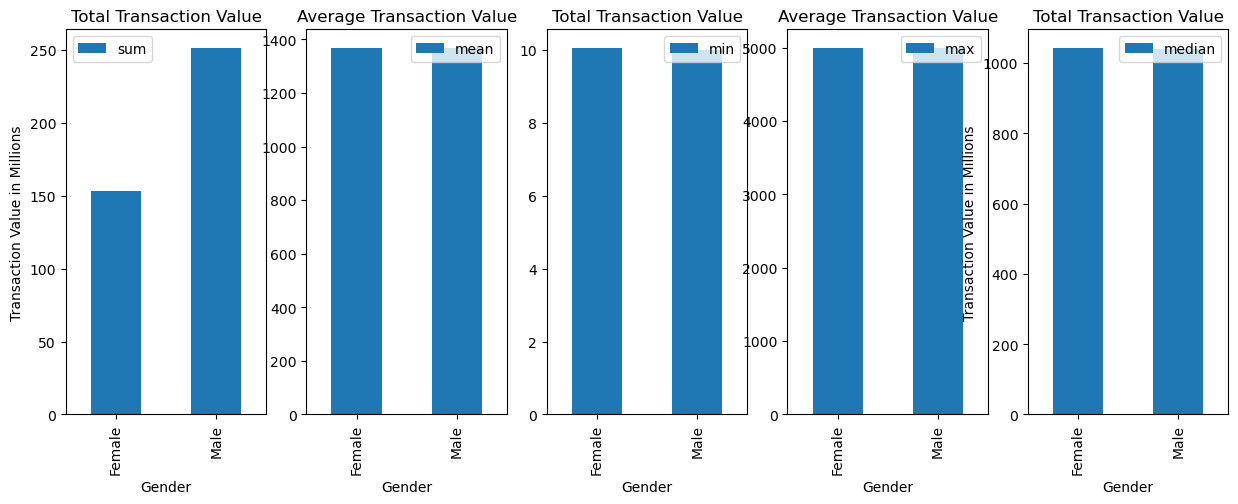

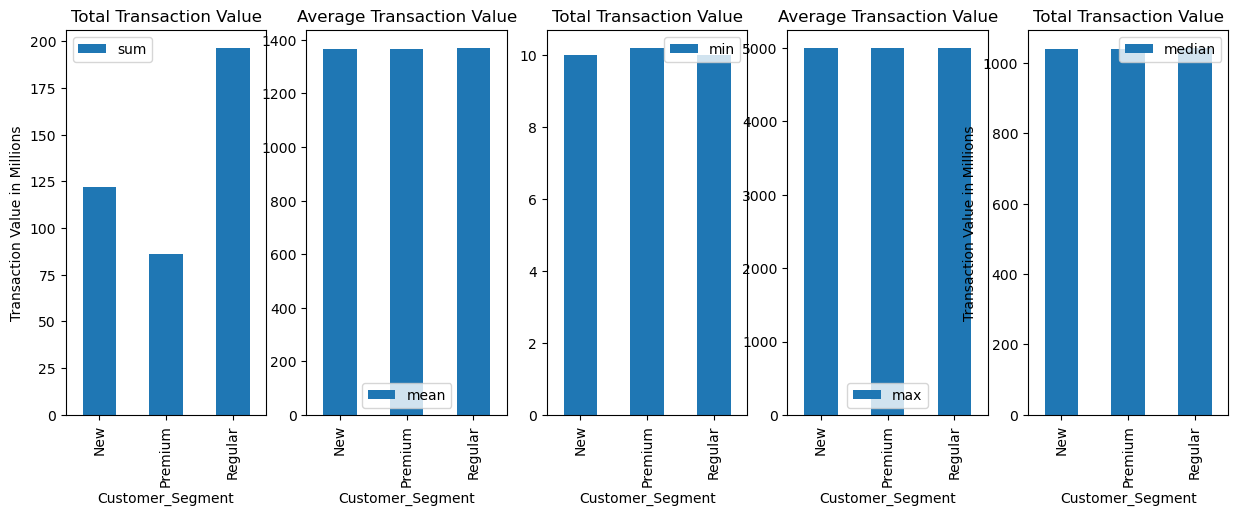

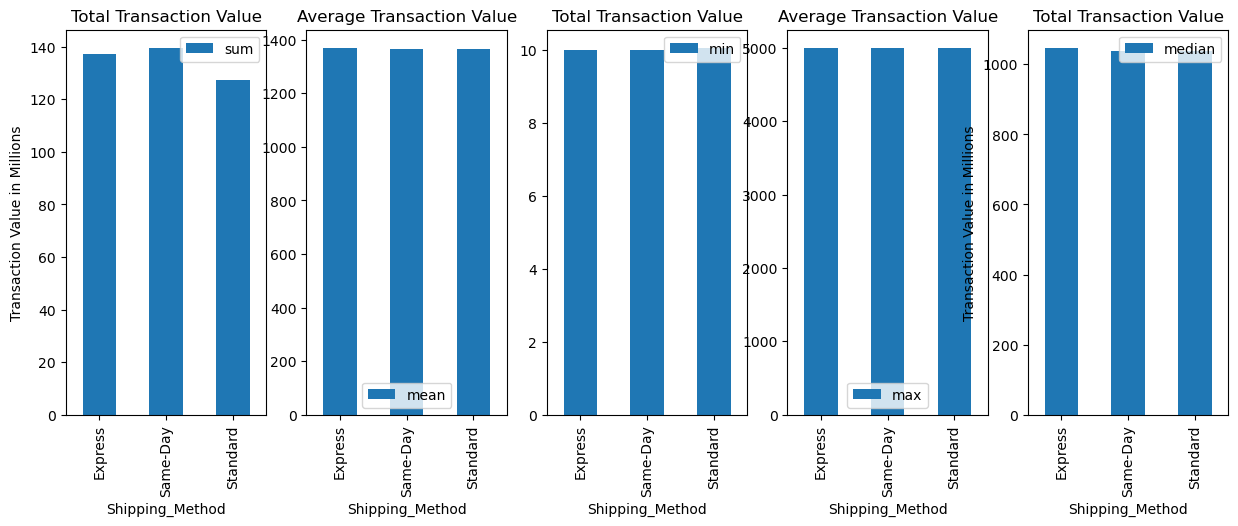

In [116]:
# Create function to plot transaction data 

def plot_transaction_summary(df, group_by_col):
    """
    Aggregates and plots transaction data based on the specified column.

    Parameters:
    df (DataFrame): The dataframe containing the transaction data.
    group_by_col (str): The column name to group by (e.g., 'Age_bin', 'Income', 'Gender', 'Country').
    """
    # Aggregate transaction amount: sum & average
    df_plot = df.groupby([group_by_col])['Total_Amount'].agg(['sum', 'mean','min','max','median']).reset_index()

    # Convert Total Sum into Millions
    df_plot['sum'] = df_plot['sum'] / 1_000_000

    # Plot
    plt.figure(figsize=(15,5))

    plt.subplot(1, 5, 1)
    df_plot.plot(x=group_by_col, y='sum', kind='bar', ax=plt.gca())
    plt.title('Total Transaction Value')
    plt.ylabel('Transaction Value in Millions')

    plt.subplot(1, 5, 2)
    df_plot.plot(x=group_by_col, y='mean', kind='bar', ax=plt.gca())
    plt.title('Average Transaction Value')

    plt.subplot(1, 5, 3)
    df_plot.plot(x=group_by_col, y='min', kind='bar', ax=plt.gca())
    plt.title('Total Transaction Value')
    # plt.ylabel('Transaction Value in Millions')

    plt.subplot(1, 5, 4)
    df_plot.plot(x=group_by_col, y='max', kind='bar', ax=plt.gca())
    plt.title('Average Transaction Value')

    plt.subplot(1, 5, 5)
    df_plot.plot(x=group_by_col, y='median', kind='bar', ax=plt.gca())
    plt.title('Total Transaction Value')
    plt.ylabel('Transaction Value in Millions')

    plt.show()

# Bin age
df['Age_bin'] = pd.cut(df['Age'], bins=10)


# Plot
# plot_transaction_summary(df, 'Age_bin')
# plot_transaction_summary(df, 'Income')
# plot_transaction_summary(df, 'Gender')
# plot_transaction_summary(df, 'Country')

plot_columns = ['Age_bin','Income','Gender','Customer_Segment','Shipping_Method']
for col in plot_columns:
    plot_transaction_summary(df, col)

## Trend Over Time

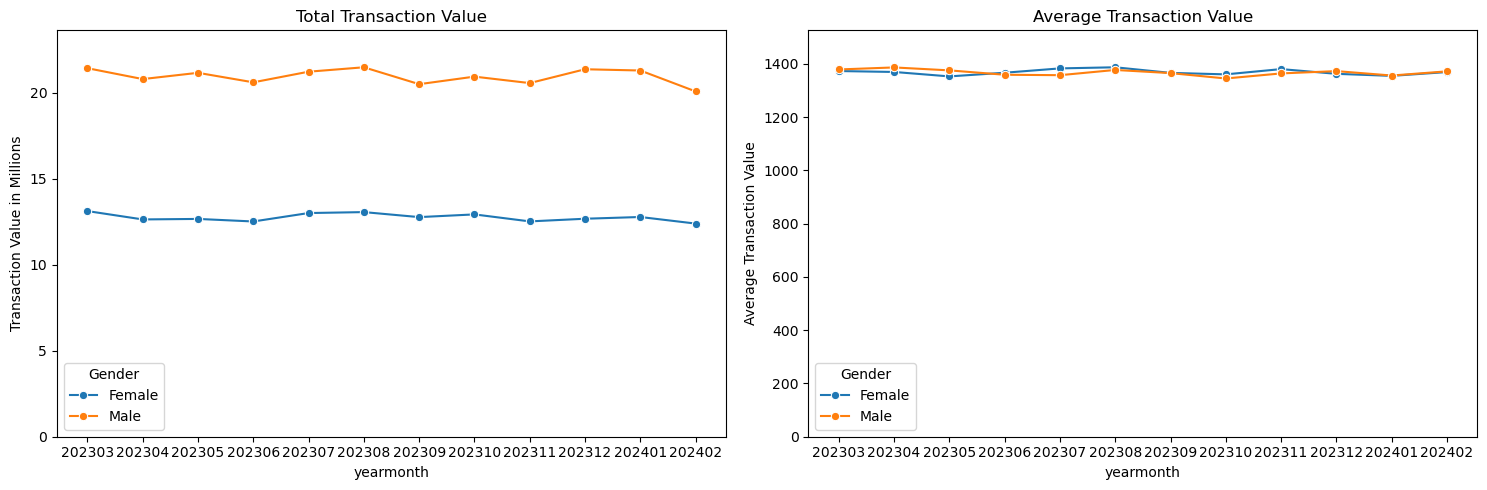

In [130]:
def plot_transaction_summary(df, group_by_col, hue_col=None):
    """
    Aggregates and plots transaction data based on the specified column using line charts with optional hue.

    Parameters:
    df (DataFrame): The dataframe containing the transaction data.
    group_by_col (str): The column name to group by (e.g., 'Age_bin', 'Income', 'Gender', 'Country').
    hue_col (str): The column name for hue (e.g., 'Gender', 'Income'). Default is None.
    """
    # Aggregate transaction amount: sum & average
    df_plot = df.groupby([group_by_col, hue_col])['Total_Amount'].agg(['sum', 'mean']).reset_index() if hue_col else df.groupby([group_by_col])['Total_Amount'].agg(['sum', 'mean']).reset_index()

    # Convert Total Sum into Millions
    df_plot['sum'] = df_plot['sum'] / 1_000_000

    # Calculate y-axis limits
    sum_max = df_plot['sum'].max()
    mean_max = df_plot['mean'].max()

    # Plot
    plt.figure(figsize=(15, 5))

    # Total Transaction Value Line Chart
    plt.subplot(1, 2, 1)
    sns.lineplot(data=df_plot, x=group_by_col, y='sum', hue=hue_col, marker='o', ax=plt.gca())
    plt.title('Total Transaction Value')
    plt.ylabel('Transaction Value in Millions')
    plt.xlabel(group_by_col)
    plt.ylim(0, sum_max * 1.1)  # Set ylim with some padding

    # Average Transaction Value Line Chart
    plt.subplot(1, 2, 2)
    sns.lineplot(data=df_plot, x=group_by_col, y='mean', hue=hue_col, marker='o', ax=plt.gca())
    plt.title('Average Transaction Value')
    plt.ylabel('Average Transaction Value')
    plt.xlabel(group_by_col)
    plt.ylim(0, mean_max * 1.1)  # Set ylim with some padding

    plt.tight_layout()
    plt.show()

# Example Usage
plot_transaction_summary(df, 'yearmonth', hue_col='Gender')

# EDA Summary
#### Overall
- Order history of a retailer that ships products
- Data spans 5 countries: Germany, UK, Australia, Canada, USA
- Main Product Categories: Clothing, Electronics, Books, Home Decor, Grocery


#### Age
- average 35.5 years, ranges from 18 to 70, 50% age percentile =  32 years

#### Transaction Value
- Highest transaction value: Age 18-23, Medium income, Male, Regular customer. Total transaction value is similar across shipping methods
- Average transaction value is similar across different demographic characteristics such as income, age, gender, country, shipping method, customer segment


# Model Exploration

## KNN Classification

In [141]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [137]:
model_data = df

# Encode categorical variables
label_encoders = {}
# for column in ['Gender', 'Income', 'Product_Category', 'Product_Brand','City','Product_Type']:
for column in cat_columns:
    le = LabelEncoder()
    model_data[column] = le.fit_transform(model_data[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
model_data[quan_columns] = scaler.fit_transform(model_data[quan_columns])


KNN Model

In [147]:
df.head(2)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,yearmonthday,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth,Age_bin,Cluster
0,1.231929,-0.683118,35,4,2,-0.963242,1,1,2,2023-09-18,2023.0,September,22:03:55,-0.822819,-1.040485,-0.924469,1,10,23,2,1,2,3,1.391396,86,202309,"(17.948, 23.2]",2
1,-1.278621,0.566348,87,9,3,-1.096402,0,1,1,2023-12-31,2023.0,December,8:42:04,-1.171458,1.048250,-0.496912,2,14,28,2,2,1,2,0.634218,164,202312,"(17.948, 23.2]",2


In [153]:
# simple KNN model

# Select features for clustering
features = ['Age', 'Gender', 'Income', 'Total_Amount', 'Product_Category','Country']

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
model_data['Cluster'] = kmeans.fit_predict(model_data[features])



# Features and target
X = model_data[features]
y = model_data['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9996109870780056


In [151]:
# Perform grid search on KNN model
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaler and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameters for grid search
param_grid = {
    'knn__n_neighbors': [3,4, 5,6,7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Accuracy: 0.9999323455787835


Test Model

In [152]:
# # New customer data
# new_customer = {
#     'Age': 27,
#     'Gender': 'Male',
#     'Income': 'High',
#     'Total_Purchases': 4,
#     'Total_Amount': 1200.00,
#     'Product_Category': 'Electronics',
#     'Product_Brand': 'Samsung'
# }
# new_customer_df = pd.DataFrame([new_customer])

# # Encode and scale new customer data
# for column in ['Gender', 'Income', 'Product_Category', 'Product_Brand']:
#     new_customer_df[column] = label_encoders[column].transform(new_customer_df[column])

# new_customer_df[['Age', 'Total_Purchases', 'Total_Amount']] = pipeline.named_steps['scaler'].transform(new_customer_df[['Age', 'Total_Purchases', 'Total_Amount']])

# # Predict cluster for the new customer
# predicted_cluster = best_knn.predict(new_customer_df[features])
# print(f'Predicted Customer Segment: {predicted_cluster[0]}')